In [1]:
#numerical python= used for working with matrices
import numpy as np
#used for data analysis and ml tasks
import pandas as pd
#used to iterate over data structures
import itertools
#split arrays or matrces into random train and test subsets
from sklearn.model_selection import train_test_split
#convert collection of raw document to matrix
from sklearn.feature_extraction.text import TfidfVectorizer
#algorithm 
from sklearn.linear_model import PassiveAggressiveClassifier
#accuracy classification score:
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Read the data
df=pd.read_csv('news.csv')


In [3]:
#returns dimentionality of dataset that is no of rows and no of columns
df.shape

(6335, 4)

In [4]:
#returns size of dataset that is number of rows * number of columns
df.size

25340

In [5]:
#returns dimensions of dataframe
df.ndim

2

In [6]:
#returns length of FAKE results
len(df[df['label']=="FAKE"])

3164

In [7]:
#returns length of REAL results
len(df[df['label']=="REAL"])

3171

In [8]:
#display summary of datset like memory usage, column datatype,non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [9]:
#display top n no of rows of dataset
df.head(6)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE


In [10]:
#Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [11]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [12]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [13]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


In [14]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])


array([[586,  52],
       [ 40, 589]], dtype=int64)

In [15]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x206f8ad8d30>,
 [Text(0, 0, 'REAL'), Text(1, 0, 'FAKE')])

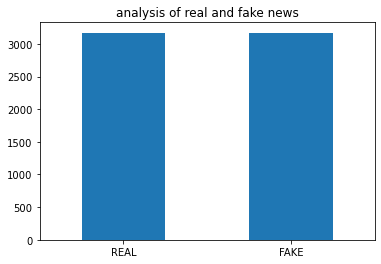

In [16]:
count_classes = pd.value_counts(df['label'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("analysis of real and fake news")
plt.xticks(range(2))

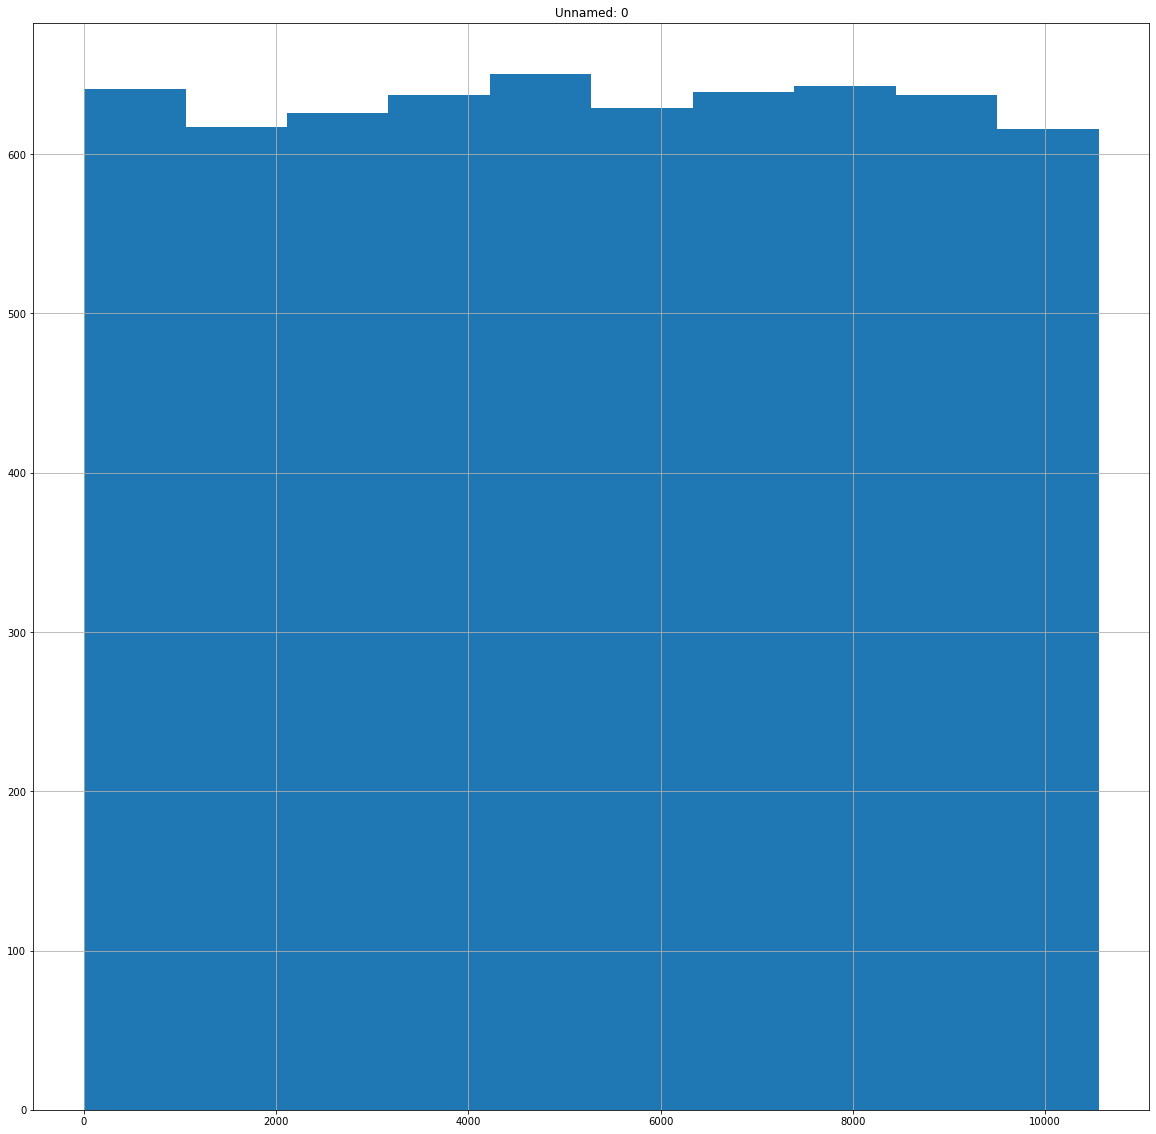

In [17]:
df.hist(figsize=(20,20))
plt.show()

In [18]:
#corelation
import seaborn as sns

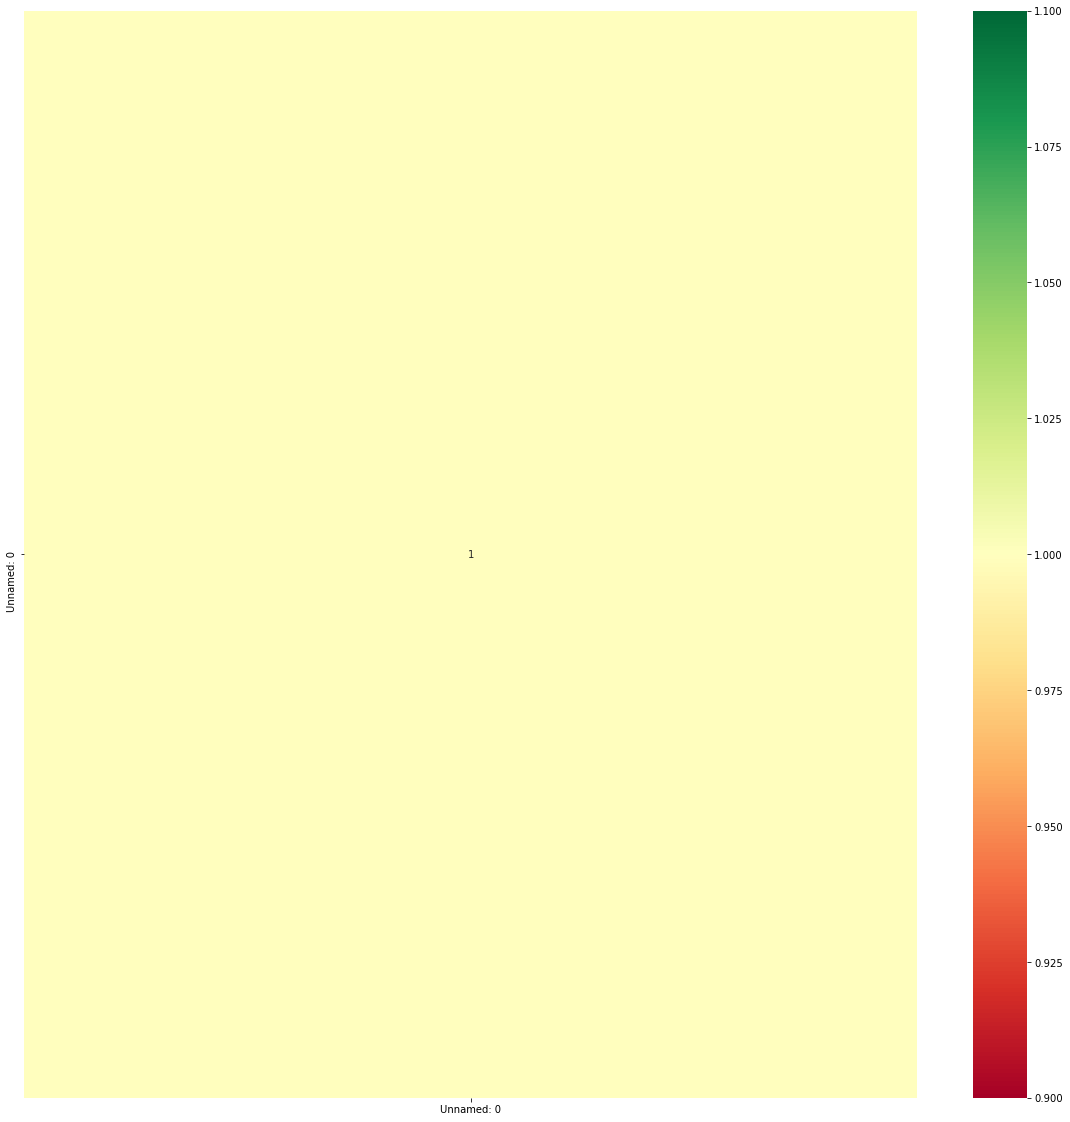

In [19]:
#get corelation of each feature in dataset
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")